In [183]:
import torch
import numpy as np 
import pandas as pd 
from torch import nn
import matplotlib.pyplot as plt


In [184]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [185]:
len(X), len(y)

(50, 50)

In [186]:
#train split 
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test) 

(40, 10)

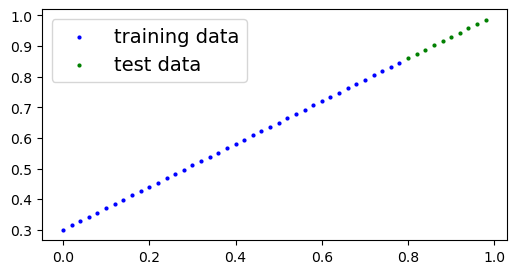

In [187]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions =None):
    plt.figure(figsize=(6,3))
    plt.scatter(train_data,train_labels,c='b', s=4, label="training data")
    plt.scatter(test_data,test_label,c='g', s=4, label="test data")
    if predictions is not None:
            plt.scatter(test_data,predictions,c='r', s=4, label="predictions")

    plt.legend(prop={"size" :14})
    
    
plot_predictions()

In [188]:
#Creating a linear regression class
class LinearRegressionmodel(nn.Module): #almost everything in pytorch inherits from nn.Module
    def __init__(self):
       super().__init__()
       self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype= torch.float))
       self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype= torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [189]:
#create a random seed 
torch.manual_seed(42)

model_0 = LinearRegressionmodel()
#list our model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [190]:
#list the named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [191]:
#make a prediction
with torch.inference_mode(): #this will turn of the gradient tracking.
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

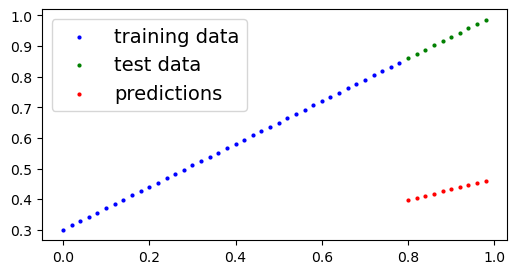

In [192]:
plot_predictions(predictions=y_preds)

In [193]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [194]:
#looping through the data
torch.manual_seed(42)

#track different values
epochs_count = []
loss_values = []
test_loss_values = []

epochs = 1000
for epoch in range(epochs):
    model_0.train() #sets all parameters that require gradient to require gradient
    
    #1. forward pass
    y_pred = model_0(X_train)
    
    #2. calculate the loss function
    loss = loss_fn(y_pred, y_train) #input first target next
    
    #3. optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5. Step the optimizer. Perform gradient descent
    optimizer.step() #by default how the optimizer changes will accumulate through the loop.
    #we have to zero them at step 3. We want to start fresh after each iteration
    ##testing 
    model_0.eval() #turns off gradient tracking. THIS turns off different settings in the model not needed for evaluation/testing
    #such ass droput and batch norm layers
    with torch.inference_mode(): #this turns off gradient tracking
        #1. do the forward pass
        test_pred = model_0(X_test)
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred,y_test)
        
    if epoch % 10 == 0:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"epoch:{epoch} with loss: {loss} and test_loss: {test_loss}")
    

epoch:0 with loss: 0.31288138031959534 and test_loss: 0.48106518387794495
epoch:10 with loss: 0.1976713240146637 and test_loss: 0.3463551998138428
epoch:20 with loss: 0.08908725529909134 and test_loss: 0.21729660034179688
epoch:30 with loss: 0.053148526698350906 and test_loss: 0.14464017748832703
epoch:40 with loss: 0.04543796554207802 and test_loss: 0.11360953003168106
epoch:50 with loss: 0.04167863354086876 and test_loss: 0.09919948130846024
epoch:60 with loss: 0.03818932920694351 and test_loss: 0.08886633068323135
epoch:70 with loss: 0.03476089984178543 and test_loss: 0.0805937647819519
epoch:80 with loss: 0.03132382780313492 and test_loss: 0.07232122868299484
epoch:90 with loss: 0.02788740023970604 and test_loss: 0.06473556160926819
epoch:100 with loss: 0.024458957836031914 and test_loss: 0.05646304413676262
epoch:110 with loss: 0.021020209416747093 and test_loss: 0.04819049686193466
epoch:120 with loss: 0.01758546754717827 and test_loss: 0.04060482233762741
epoch:130 with loss: 0.

In [196]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [197]:
weight,bias

(0.7, 0.3)

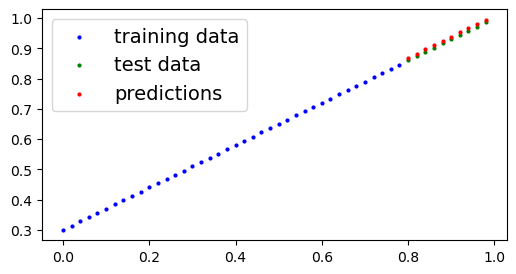

In [198]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

In [212]:
#saving a model in pytorch
#torch.save save in pickle format
#torch.load allows you to load a model
#torch.nn.Module.load_state_dict() allows you to load a model's state_dict
# model_0.state_dict() -> OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


import pathlib
from pathlib import Path
#1) create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)
#2) create models save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#3) Save the model's state_dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [213]:
#check that the file exists. We have successfully saved our model

!ls -l models

total 8
-rw-r--r--@ 1 antonis  staff  1207 Feb 25 12:09 01_pytorch_workflow_model_0.pth


In [217]:
#loading a pytorch model
#to load a saved model we need to instantiate an new instance of the model
loaded_model_0 = LinearRegressionmodel()
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [219]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds
model_0.eval()
with torch.inference_mode():
    model_0_preds = model_0(X_test)
#check if the two models give the same results
loaded_model_preds==model_0_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [231]:
# check the model current device
# next(model_0.parameters()).device

In [225]:
# #sending data to the gpu 
# device = 'mps'
# model_0.to(device)
# next(model_0.parameters()).device

device(type='mps', index=0)